# Homework project | Reinforcement Learning | Maryam Rahbaralam

# Question 3:



### Question 3.1: Upper Confidence Bound Bandit (UCB)

In [6]:
class ucb_bandit:
    '''
    Upper Confidence Bound k-bandit problem
    
    Inputs 
    ============================================
    k: number of arms (int)
    c:
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from
        a normal distribution with mean = 0. 
        Set to "sequence" for the means to be ordered from 
        0 to k-1.
        Pass a list or array of length = k for user-defined
        values.
    '''
    def __init__(self, k, c, iters, mu='random'):
        # Number of arms
        self.k = k
        # Exploration parameter
        self.Delta = Delta
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 1
        # Step count for each arm
        self.k_n = np.ones(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)
        
    def pull(self):
        # Select action according to UCB Criteria
        a = np.argmax(self.k_reward + self.Delta * np.sqrt(
                (np.log(self.n)) / self.k_n))
            
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self, mu=None):
        # Resets results while keeping settings
        self.n = 1
        self.k_n = np.ones(self.k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(self.k)
        if mu == 'random':
            self.mu = np.random.normal(0, 1, self.k)

In [7]:
def rewards_ucb( episodes, iters, Delta, k):
    
    ucb_rewards = np.zeros(iters)
# Initialize bandits
    ucb = ucb_bandit(k, Delta, iters)

    episodes = 1000
    
    # Run experiments
    for i in range(episodes): 
        ucb.reset('random')
        # Run experiments
        ucb.run()
    
        # Update long-term averages
        ucb_rewards = ucb_rewards + (
        ucb.reward - ucb_rewards) / (i + 1)
   
    return ucb_rewards

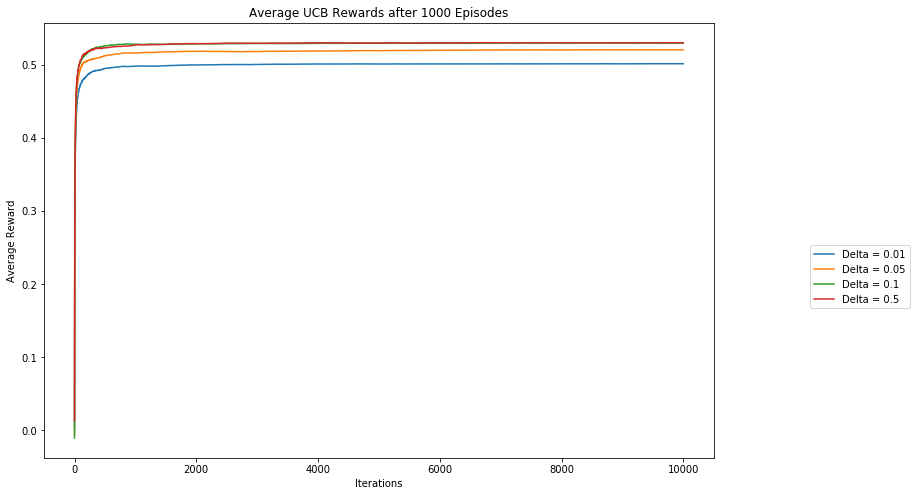

In [121]:
Delta1 = 0.01
Delta2 = 0.05
Delta3 = 0.1
Delta4 = 0.5

k = 2
iters = 10000

# Initialize bandits
#ucb = ucb_bandit(k, 2, iters, mu=grad.mu)
#ucb.mu = grad.mu
#ucb_rewards = np.zeros(iters)
ucb_rewards1 = rewards_ucb(episodes, iters, Delta1, k)
ucb_rewards2 = rewards_ucb(episodes, iters, Delta2, k)
ucb_rewards3 = rewards_ucb(episodes, iters, Delta3, k)
ucb_rewards4 = rewards_ucb(episodes, iters, Delta4, k)



plt.figure(figsize=(12,8))
plt.plot(ucb_rewards1, label="Delta = 0.01")
plt.plot(ucb_rewards2, label="Delta = 0.05")
plt.plot(ucb_rewards3, label="Delta = 0.1")
plt.plot(ucb_rewards4, label="Delta = 0.5")
#plt.plot(ucb_rewards, label="UCB")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average UCB Rewards after " 
          + str(episodes) + " Episodes")
plt.show()

### Implement the UCB algorithm and plot its total reward after T = 10; 000 rounds as a function of $\Delta$.

In [147]:
T = 9999
ucb_F = [ucb_rewards1[T],ucb_rewards2[T],ucb_rewards3[T],ucb_rewards4[T]]
Delta = [ 0.01, 0.05, 0.1, 0.5]
ucb_F

[0.5019200816969412,
 0.5210102401408458,
 0.5301606367395701,
 0.5305969212185762]

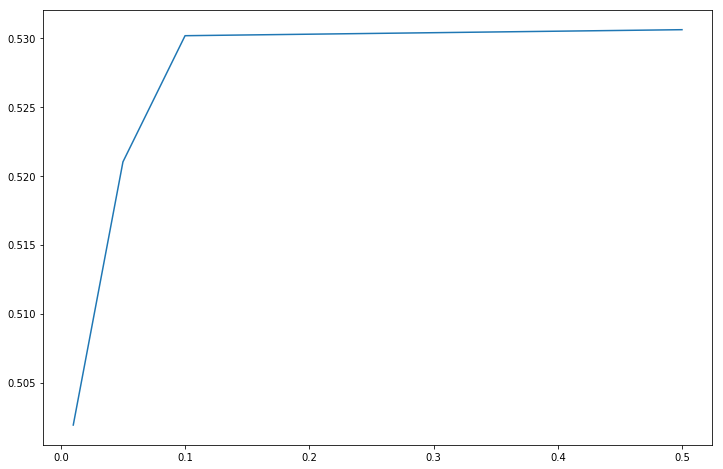

In [148]:
plt.figure(figsize=(12,8))
plt.plot(Delta,ucb_F)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xlabel("Delta")
plt.ylabel("Average Reward")
plt.title("Average $\UCB algorithm $ Rewards after " + str(episodes) + " Episodes")
plt.show() 

## Question 3.2:  $\varepsilon \text { -greedy algorithm }$

In [8]:
class eps_bandit:
    '''
    epsilon-greedy k-bandit problem
    
    Inputs
    =====================================================
    k: number of arms (int)
    eps: probability of random action 0 < eps < 1 (float)
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from
        a normal distribution with mean = 0. 
        Set to "sequence" for the means to be ordered from 
        0 to k-1.
        Pass a list or array of length = k for user-defined
        values.
    '''
    
    def __init__(self, k, eps, iters, Delta, mu='random'):
        # Number of arms
        self.k = k
        # Search probability
        self.eps = eps
        # Number of iterations
        self.iters = iters
        # Step count
        self.n = 0
        # Step count for each arm
        self.k_n = np.zeros(k)
        # Total mean reward
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
        self.Delta = Delta
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k)
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-Delta, k)
        
    def pull(self):
        # Generate random number
        p = np.random.rand()
        if self.eps == 0 and self.n == 0:
            a = np.random.choice(self.k)
        elif p < self.eps:
            # Randomly select an action
            a = np.random.choice(self.k)
        else:
            # Take greedy action
            a = np.argmax(self.k_reward)
            
        reward = np.random.normal(self.mu[a], 1)
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        # Update results for a_k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self):
        # Resets results while keeping settings
        self.n = 0
        self.k_n = np.zeros(k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(k)

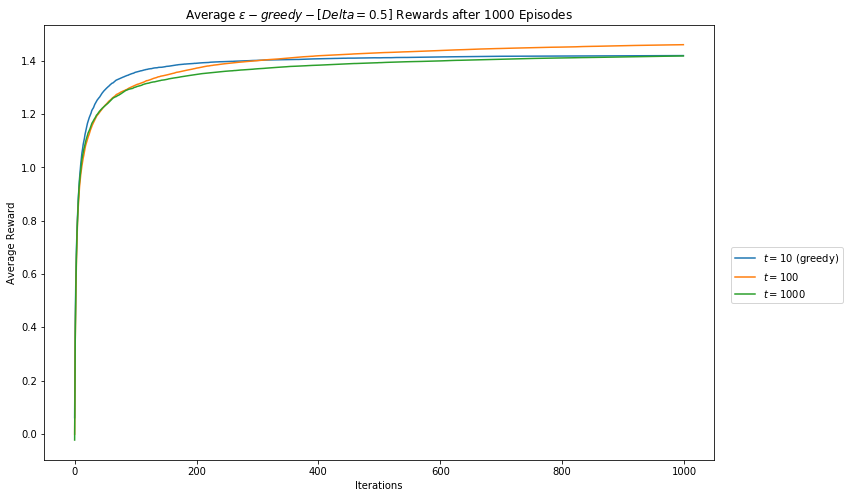

[1.4188270226266957, 1.4597231927824008, 1.4175773727386602]

In [171]:
k = 2
Delta= 0.5
iters = 1000
c = 1
t1 = 10
t2 = 100
t3 = 1000
eps1 = c/t1
eps2 = c/t2
eps3 = c/t3

eps_1_rewards = np.zeros(iters)
eps_2_rewards = np.zeros(iters)
eps_3_rewards = np.zeros(iters)

episodes = 1000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_1 = eps_bandit(k, eps1 , iters, Delta, mu='sequence')
    eps_2 = eps_bandit(k, eps2, iters, Delta,mu='sequence')
    eps_3 = eps_bandit(k, eps3, iters,Delta, mu='sequence')
    
    # Run experiments
    eps_1.run()
    eps_2.run()
    eps_3.run()
    
    # Update long-term averages
    
    eps_1_rewards = eps_1_rewards + (eps_1.reward - eps_1_rewards) / (i + 1)
    eps_2_rewards = eps_2_rewards + (eps_2.reward - eps_2_rewards) / (i + 1)
    eps_3_rewards = eps_3_rewards + (eps_3.reward - eps_3_rewards) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(eps_1_rewards, label="$t=10$ (greedy)")
plt.plot(eps_2_rewards, label="$t=100$")
plt.plot(eps_3_rewards, label="$t=1000$")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy-[Delta=0.5]$ Rewards after " + str(episodes) + " Episodes")
plt.show()

T = 999
rewards_F4 = [eps_1_rewards[T],eps_2_rewards [T],eps_3_rewards[T]]
rewards_F4

I set up some comparisons using different values of  ϵ . For each of these, we'll set  k=2 , run 10,000 steps for each episode and run 1,000 episodes. After each episode, we will reset the bandits and copy the averages across the different bandits to keep things consistent.
Looking at the results, the greedy function underperforms the other two consistently, with  ϵ=0.01  coming in between the two and  ϵ=0.1  

## Question 3.2: Implement the $\varepsilon \text { -greedy algorithm }$ with $\varepsilon_{t}=c / t $ for various choices of t. Plot its total reward after T = 10000 rounds as a function of $\Delta
$.

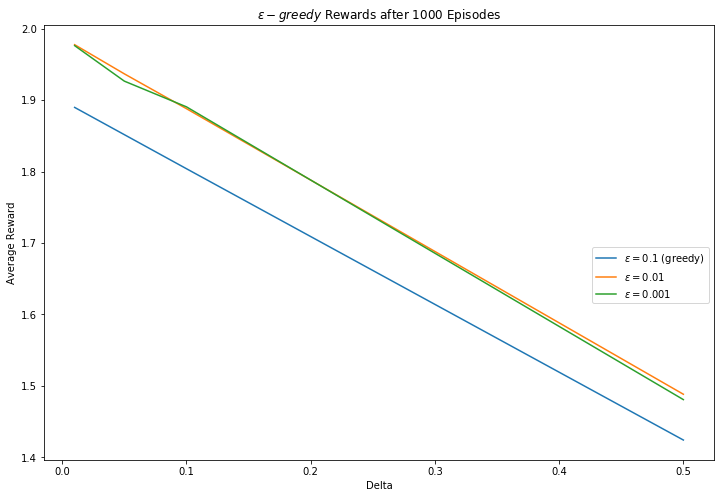

In [204]:
k = 2
Delta= [0.01, 0.05, 0.1, 0.5]
iters = 10000
c = 1
t1 = 10
t2 = 100
t3 = 1000

eps1 = c/t1
eps2 = c/t2
eps3 = c/t3
T = 9999

eps_1_rewards = np.zeros((iters, len(Delta)))
eps_2_rewards = np.zeros((iters, len(Delta)))
eps_3_rewards = np.zeros((iters, len(Delta)))

episodes = 1000
# Run experiments
for i in range(episodes):
    # Initialize bandits
    for j in range(0, len(Delta)):
        eps_1= eps_bandit(k, eps1, iters, Delta[j], mu='sequence')
        eps_2= eps_bandit(k, eps2, iters, Delta[j], mu='sequence')
        eps_3= eps_bandit(k, eps3, iters, Delta[j], mu='sequence')
    
        # Run experiments
        eps_1.run()
        eps_2.run()
        eps_3.run()
    
        # Update long-term averages
        eps_1_rewards[:,j] = eps_1_rewards[:,j] + (eps_1.reward - eps_1_rewards[:,j]) / (i + 1)
        eps_2_rewards[:,j] = eps_2_rewards[:,j] + (eps_2.reward - eps_2_rewards[:,j]) / (i + 1)
        eps_3_rewards[:,j] = eps_3_rewards[:,j] + (eps_3.reward - eps_3_rewards[:,j]) / (i + 1)
    
plt.figure(figsize=(12,8))
plt.plot(Delta, eps_1_rewards[T,:], label="$\epsilon=0.1$ (greedy)")
plt.plot(Delta, eps_2_rewards[T,:], label="$\epsilon=0.01$")
plt.plot(Delta, eps_3_rewards[T,:], label="$\epsilon=0.001$")
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xlabel("Delta")
plt.ylabel("Average Reward")
plt.title("$\epsilon-greedy$ Rewards after " + str(episodes) + " Episodes")
plt.show()


Text(0.5, 1.0, 'Average Gradient Bandit Rewards after 1000 Episodes')

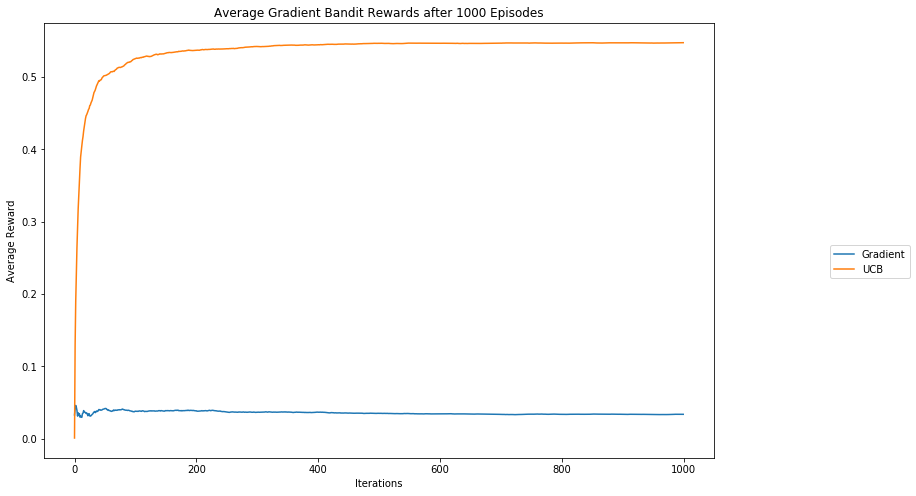

In [36]:
k = 2
Delta= 0.05
iters = 1000
# Initialize bandits
grad = grad_bandit(k, 0.01, Delta , iters, mu='random')
ucb = ucb_bandit(k, 2, iters, mu=grad.mu)
ucb.mu = grad.mu

ucb_rewards = np.zeros(iters)
grad_rewards = np.zeros(iters)
opt_grad = 0
opt_ucb = 0

episodes = 1000
# Run experiments
for i in range(episodes):
    # Reset counts and rewards
    grad.reset('random')
    ucb.reset()
    ucb.mu = grad.mu
    
    # Run experiments
    grad.run()
    ucb.run()
    
    # Update long-term averages
    grad_rewards = grad_rewards + (
        grad.reward - grad_rewards) / (i + 1)
    ucb_rewards = ucb_rewards + (
        ucb.reward - ucb_rewards) / (i + 1)
    
    # Count optimal actions
    opt_grad += grad.k_n[np.argmax(grad.mu)]
    opt_ucb += ucb.k_n[np.argmax(ucb.mu)]
    
plt.figure(figsize=(12,8))
plt.plot(grad_rewards, label="Gradient")
plt.plot(ucb_rewards, label="UCB")
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Gradient Bandit Rewards after " 
          + str(episodes) + " Episodes")
#plt.show()

In [35]:
print("Percentage of Optimal Selections for all episodes\nUCB: %.2f\nGradient: %.2f" 
      %(opt_ucb / (episodes * iters) * 100, 
        (opt_grad / (episodes * iters) * 100)))
opt_per = np.array([opt_ucb / (episodes * iters) * 100, opt_grad / (episodes * iters) * 100])
df = pd.DataFrame(opt_per,index = ["UCB" , "Gradient"], columns=["Percentage of Optimal Selections"] )
df

Percentage of Optimal Selections for all episodes
UCB: 87.91
Gradient: 49.51


,Percentage of Optimal Selections
UCB,87.9115
Gradient,49.5104
